In [0]:
!kill -9 -1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!git clone https://github.com/Rjunjun/ml_homework.git

Cloning into 'ml_homework'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 12606 (delta 6), reused 16 (delta 5), pack-reused 12588
Receiving objects: 100% (12606/12606), 1.67 GiB | 53.33 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (12678/12678), done.


In [3]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.utils import np_utils, plot_model
import cv2
from PIL import Image
import pandas as pd
from keras.models import Sequential, model_from_yaml, load_model
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [4]:
train_images_path = '/content/ml_homework/train_images'
train_images = os.listdir(train_images_path) 
print("train_images size :",len(train_images))

train_images size : 2528


In [0]:
#確定train_data裡的IMG是否為一樣大小
for i in train_images :
     img = cv2.imread(train_images_path+"/"+i)
     if img.shape != (512,512,3) :
         print('ee')


In [0]:
train_images.sort()
trainDataPaths = []
for i in train_images:
    trainDataPaths.append(train_images_path+"/"+i)

In [0]:
pixel_depth = 255.0

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, 512, 512, 3), dtype=np.float32)

    for i, image_file in enumerate(images) :
        img = cv2.imread(image_file)
        image_data = np.array(img, dtype=np.float32)
        #正規化
        image_data[:, :, 0] = (image_data[:, :, 0].astype(float) - pixel_depth / 2) / pixel_depth
        image_data[:, :, 1] = (image_data[:, :, 1].astype(float) - pixel_depth / 2) / pixel_depth
        image_data[:, :, 2] = (image_data[:, :, 2].astype(float) - pixel_depth / 2) / pixel_depth

        data[i] = image_data
        if i % 50 == 0:
            print("Processed {} of {}".format(i, count))

    return data

In [7]:
data = prep_data(trainDataPaths)

Processed 0 of 2528
Processed 50 of 2528
Processed 100 of 2528
Processed 150 of 2528
Processed 200 of 2528
Processed 250 of 2528
Processed 300 of 2528
Processed 350 of 2528
Processed 400 of 2528
Processed 450 of 2528
Processed 500 of 2528
Processed 550 of 2528
Processed 600 of 2528
Processed 650 of 2528
Processed 700 of 2528
Processed 750 of 2528
Processed 800 of 2528
Processed 850 of 2528
Processed 900 of 2528
Processed 950 of 2528
Processed 1000 of 2528
Processed 1050 of 2528
Processed 1100 of 2528
Processed 1150 of 2528
Processed 1200 of 2528
Processed 1250 of 2528
Processed 1300 of 2528
Processed 1350 of 2528
Processed 1400 of 2528
Processed 1450 of 2528
Processed 1500 of 2528
Processed 1550 of 2528
Processed 1600 of 2528
Processed 1650 of 2528
Processed 1700 of 2528
Processed 1750 of 2528
Processed 1800 of 2528
Processed 1850 of 2528
Processed 1900 of 2528
Processed 1950 of 2528
Processed 2000 of 2528
Processed 2050 of 2528
Processed 2100 of 2528
Processed 2150 of 2528
Processed 2

In [0]:
from sklearn.preprocessing import OneHotEncoder
dfLabel = pd.read_csv('ml_homework/train.csv')
np_label = np.array(dfLabel['Label'])
np_label = np_utils.to_categorical(np_label)
(x_train, x_test, y_train, y_test) = train_test_split(data, np_label, test_size=0.2, random_state=42)


In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', input_shape=(512, 512, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 512, 512, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 128, 64)      0         


In [10]:
sgd = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
train_history = model.fit(x_train, y_train, batch_size=20, epochs=30, verbose=2, validation_data=(x_test, y_test))




Train on 2022 samples, validate on 506 samples
Epoch 1/30





 - 411s - loss: 0.3704 - acc: 0.8560 - val_loss: 0.3442 - val_acc: 0.8455
Epoch 2/30
 - 398s - loss: 0.2347 - acc: 0.8977 - val_loss: 0.2796 - val_acc: 0.8785
Epoch 3/30
 - 405s - loss: 0.1885 - acc: 0.9226 - val_loss: 0.2188 - val_acc: 0.9061
Epoch 4/30
 - 402s - loss: 0.1723 - acc: 0.9280 - val_loss: 0.1955 - val_acc: 0.9078
Epoch 5/30
 - 403s - loss: 0.1382 - acc: 0.9464 - val_loss: 0.1862 - val_acc: 0.9130
Epoch 6/30
 - 401s - loss: 0.1180 - acc: 0.9546 - val_loss: 0.1823 - val_acc: 0.9397
Epoch 7/30
 - 401s - loss: 0.1008 - acc: 0.9650 - val_loss: 0.1603 - val_acc: 0.9466
Epoch 8/30
 - 401s - loss: 0.1036 - acc: 0.9608 - val_loss: 0.1623 - val_acc: 0.9473
Epoch 9/30
 - 402s - loss: 0.0999 - acc: 0.9628 - val_loss: 0.1719 - val_acc: 0.9348
Epoch 10/30
 - 402s - loss: 0.0663 - acc: 0.9783 - val_loss: 0.1774 - val_acc: 0.9361
Epoch 11/30
 - 400s - loss: 0.0697 - acc: 0.9760 - val_loss: 0.1641 - val_acc: 0.9427
Epoch 12

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/AOI/1101.h5') 

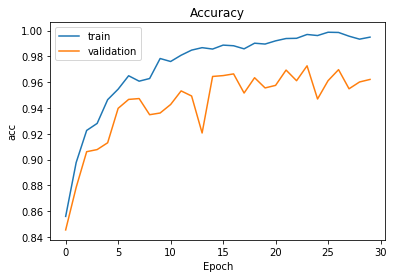

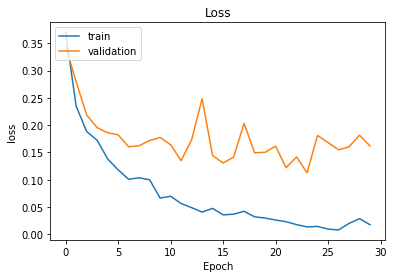

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history, title, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title)
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

show_train_history(train_history, 'Accuracy', 'acc', 'val_acc')
show_train_history(train_history, 'Loss', 'loss', 'val_loss')

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/AOI/1101.h5')

In [14]:
test_images_path = 'ml_homework/test_images'
test_images = os.listdir(test_images_path)
print("test_images size :",len(test_images))
test_images.sort()
testDataPaths = []
for i in test_images:
    testDataPaths.append(test_images_path+"/"+i)

test_images size : 10142


In [0]:
#freed RAM 
data = None
(x_train, x_test, y_train, y_test) = (None,None,None,None)
train_images = None
trainDataPaths = None

In [16]:
testData = prep_data(testDataPaths)
answer = model.predict_classes(testData)

Processed 0 of 10142
Processed 50 of 10142
Processed 100 of 10142
Processed 150 of 10142
Processed 200 of 10142
Processed 250 of 10142
Processed 300 of 10142
Processed 350 of 10142
Processed 400 of 10142
Processed 450 of 10142
Processed 500 of 10142
Processed 550 of 10142
Processed 600 of 10142
Processed 650 of 10142
Processed 700 of 10142
Processed 750 of 10142
Processed 800 of 10142
Processed 850 of 10142
Processed 900 of 10142
Processed 950 of 10142
Processed 1000 of 10142
Processed 1050 of 10142
Processed 1100 of 10142
Processed 1150 of 10142
Processed 1200 of 10142
Processed 1250 of 10142
Processed 1300 of 10142
Processed 1350 of 10142
Processed 1400 of 10142
Processed 1450 of 10142
Processed 1500 of 10142
Processed 1550 of 10142
Processed 1600 of 10142
Processed 1650 of 10142
Processed 1700 of 10142
Processed 1750 of 10142
Processed 1800 of 10142
Processed 1850 of 10142
Processed 1900 of 10142
Processed 1950 of 10142
Processed 2000 of 10142
Processed 2050 of 10142
Processed 2100 

In [17]:
answerID = []
for i in testDataPaths :
    answerID.append(i[-14:])
dictdf = {'ID':answerID,'Label':answer}    
answerDf = pd.DataFrame(dictdf)
answerDf

,ID,Label
0,test_00000.png,1
1,test_00001.png,2
2,test_00002.png,5
3,test_00003.png,0
4,test_00004.png,2
...,...,...
10137,test_10137.png,4
10138,test_10138.png,1
10139,test_10139.png,1
10140,test_10140.png,4


In [0]:
answerDf.to_csv('/content/drive/My Drive/Colab Notebooks/AOI/answer1103.csv',index=False)

In [0]:
testData = None
answer = None